## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Stakeholder: Real Estate Investment Firm interested in buying houses, improving them, and selling them.
Target: price

# EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

## Functions

In [2]:
def drop_outliers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1

    lower_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr

    df = df.loc[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ].reset_index(drop=True)
    return df

In [3]:
def scale_numberical_cols(df, cols_to_scale):
    df = df.copy()
    features = cols_to_scale
    autoscaler = StandardScaler()
    df[features] = autoscaler.fit_transform(df[features])
    return df


## EDA

In [4]:
df = pd.read_csv('data/kc_house_data.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


### Drop Outliers (+- 1.5x Interquartile Range)

In [6]:
df = drop_outliers(df, 'sqft_living').reset_index(drop=True)
df = drop_outliers(df, 'lat').reset_index(drop=True)
df = drop_outliers(df, 'long').reset_index(drop=True)
df = drop_outliers(df, 'price').reset_index(drop=True)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.644800e+04,2.644800e+04,26448.000000,26448.000000,26448.000000,2.644800e+04,26448.000000,26448.000000,26448.000000,26448.000000,26448.000000,26448.000000,26448.000000,26448.000000,26448.000000
mean,4.573990e+09,9.351912e+05,3.368232,2.224686,1974.694722,1.533174e+04,1.489394,1694.948994,455.235632,315.399009,196.672754,1972.578910,84.517733,47.538115,-122.226111
std,2.872331e+09,4.291522e+05,0.944539,0.784825,757.739880,5.288984e+04,0.546934,712.103736,541.989620,268.232397,221.044850,31.396284,402.133419,0.150044,0.129056
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.000860,-122.526650
25%,2.144800e+09,6.250000e+05,3.000000,2.000000,1400.000000,4.900000e+03,1.000000,1160.000000,0.000000,0.000000,30.000000,1951.000000,0.000000,47.406360,-122.333720
50%,3.888100e+09,8.256500e+05,3.000000,2.500000,1870.000000,7.363000e+03,1.000000,1510.000000,0.000000,380.000000,130.000000,1974.000000,0.000000,47.550050,-122.257115
75%,7.298013e+09,1.190000e+06,4.000000,2.500000,2450.000000,1.013625e+04,2.000000,2110.000000,920.000000,500.000000,290.000000,1999.000000,0.000000,47.673410,-122.139277
max,9.904000e+09,2.230000e+06,11.000000,7.500000,4410.000000,3.067495e+06,4.000000,5500.000000,3560.000000,2840.000000,2880.000000,2022.000000,2022.000000,47.876700,-121.829060


### Finding & Dropping Nulls

In [7]:
df.isnull().sum().sum()

28

In [8]:
df = df.dropna().reset_index(drop=True)

In [9]:
df.isnull().sum().sum()

0

### Dropping Undesired Columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26420 entries, 0 to 26419
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             26420 non-null  int64  
 1   date           26420 non-null  object 
 2   price          26420 non-null  float64
 3   bedrooms       26420 non-null  int64  
 4   bathrooms      26420 non-null  float64
 5   sqft_living    26420 non-null  int64  
 6   sqft_lot       26420 non-null  int64  
 7   floors         26420 non-null  float64
 8   waterfront     26420 non-null  object 
 9   greenbelt      26420 non-null  object 
 10  nuisance       26420 non-null  object 
 11  view           26420 non-null  object 
 12  condition      26420 non-null  object 
 13  grade          26420 non-null  object 
 14  heat_source    26420 non-null  object 
 15  sewer_system   26420 non-null  object 
 16  sqft_above     26420 non-null  int64  
 17  sqft_basement  26420 non-null  int64  
 18  sqft_g

In [11]:
df = df.drop(['view', 
              'sqft_above',
              'sqft_basement', 
              'yr_renovated', 
              'id'
             ], axis=1)

### Extract zide codes from address to use as possible feature

In [12]:
df['zipcode'] = df.address.str[-20:-15]
df['zipcode'].value_counts()

98042    985
98038    853
98103    740
98117    731
98115    719
        ... 
98039      2
98422      1
98050      1
98296      1
98387      1
Name: zipcode, Length: 79, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26420 entries, 0 to 26419
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          26420 non-null  object 
 1   price         26420 non-null  float64
 2   bedrooms      26420 non-null  int64  
 3   bathrooms     26420 non-null  float64
 4   sqft_living   26420 non-null  int64  
 5   sqft_lot      26420 non-null  int64  
 6   floors        26420 non-null  float64
 7   waterfront    26420 non-null  object 
 8   greenbelt     26420 non-null  object 
 9   nuisance      26420 non-null  object 
 10  condition     26420 non-null  object 
 11  grade         26420 non-null  object 
 12  heat_source   26420 non-null  object 
 13  sewer_system  26420 non-null  object 
 14  sqft_garage   26420 non-null  int64  
 15  sqft_patio    26420 non-null  int64  
 16  yr_built      26420 non-null  int64  
 17  address       26420 non-null  object 
 18  lat           26420 non-nu

### Add feature for age when sold

In [14]:
df['date'].value_counts()
df['date_year'] = df['date'].apply(pd.to_datetime)
df['date_year'] = df['date_year'].dt.year
df['date_year']

df['age_when_sold'] = df['date_year'] - df['yr_built']
df['age_when_sold']

0         53
1         71
2         65
3         11
4          9
        ... 
26415    100
26416     10
26417     27
26418     16
26419     57
Name: age_when_sold, Length: 26420, dtype: int64

In [15]:
df['yr_built'].value_counts()

2021    1129
1968     482
1967     451
1978     450
1977     450
        ... 
1901      36
1935      35
1934      34
1902      31
1933      29
Name: yr_built, Length: 123, dtype: int64

In [16]:
# df[['date', 'yr_built']] = df[['date', 'yr_built']].apply(pd.to_datetime)
# df['age_when_sold'] = ((df['date'] - df['yr_built']).dt.days)/365
# df['age_when_sold'].value_counts()
# # df['yr_built'].value_counts()

In [17]:
# df['year_sold'] = df['date'].dt.year
# df['year_sold'].value_counts()
# len(df)

In [18]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,date_year,age_when_sold
count,2.642000e+04,26420.000000,26420.000000,26420.000000,2.642000e+04,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000,26420.000000
mean,9.354395e+05,3.369531,2.225360,1975.344928,1.524770e+04,1.489421,315.607419,196.662983,1972.573051,47.538172,-122.226127,2021.354996,48.781945
std,4.291241e+05,0.943124,0.784123,757.302280,5.227460e+04,0.547000,268.206900,220.967477,31.388103,0.150008,0.128973,0.478521,31.406812
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,1900.000000,47.000860,-122.526650,2021.000000,-1.000000
25%,6.250000e+05,3.000000,2.000000,1400.000000,4.900000e+03,1.000000,0.000000,30.000000,1951.000000,47.406434,-122.333679,2021.000000,22.000000
50%,8.260000e+05,3.000000,2.500000,1870.000000,7.360000e+03,1.000000,380.000000,130.000000,1974.000000,47.550115,-122.257115,2021.000000,47.000000
75%,1.190470e+06,4.000000,2.500000,2450.000000,1.013200e+04,2.000000,500.000000,290.000000,1999.000000,47.673411,-122.139277,2022.000000,70.000000
max,2.230000e+06,11.000000,7.500000,4410.000000,3.067495e+06,4.000000,2840.000000,2880.000000,2022.000000,47.876700,-121.829060,2022.000000,122.000000


Find the most correlated column to price

In [19]:
df.corr()['price'].sort_values()

age_when_sold   -0.073991
sqft_lot         0.060780
yr_built         0.075396
date_year        0.089280
long             0.145425
floors           0.209825
sqft_garage      0.216967
sqft_patio       0.233824
bedrooms         0.299602
bathrooms        0.418828
lat              0.440139
sqft_living      0.547406
price            1.000000
Name: price, dtype: float64

### EDA Visualizations

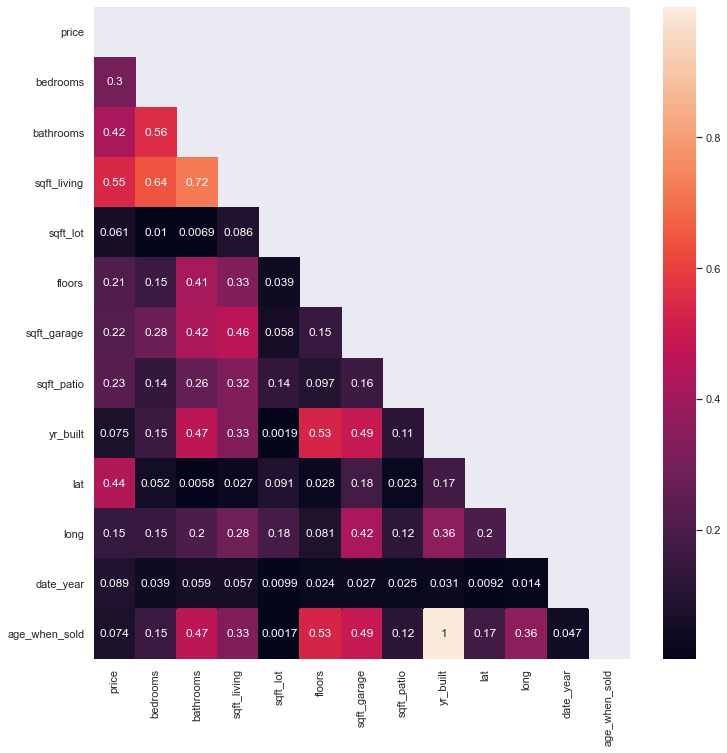

In [20]:
sns.set(rc={'figure.figsize':(12, 12)})

# Use the .heatmap function to depict the relationships visually!
mask  = np.triu(np.ones_like(df.corr()))
sns.heatmap(abs(df.corr()), annot=True, mask=mask);

In [21]:
#pairplot with wanted columns
#commented out for run-time

#sns.pairplot(df_colwanted)

Log Scale Target

<AxesSubplot:xlabel='price', ylabel='Count'>

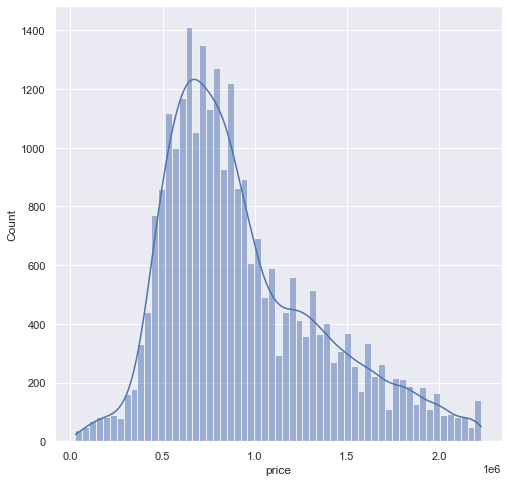

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(df.price, kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

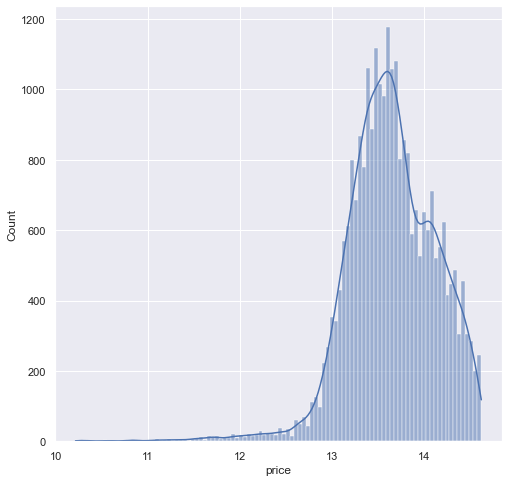

In [23]:
#logscaling target
fig, ax = plt.subplots(figsize=(8,8))
y2 = np.log(df.price)
sns.histplot(y2, kde=True)

### EDA - Baseline OLS Model

In [24]:
x = sm.add_constant(df[['sqft_living', 'sqft_lot', 'sqft_patio']])
y = df['price']
model = sm.OLS(y, x).fit()
model.rsquared

0.3033787884100603

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     3835.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:12:23   Log-Likelihood:            -3.7537e+05
No. Observations:               26420   AIC:                         7.507e+05
Df Residuals:                   26416   BIC:                         7.508e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.212e+05   6158.583     52.150      0.000    3.09e+05    3.33e+05
sqft_living   298.3032      3.077     96.946      0.000     292.272     304.334
sqft_lot        0.0567      0.043      1.330      0.183      -0.027       0.140
sqft_patio    122.8036     10.605     11.580      0.000     102.017     143.590
==============================================================================
Omnibus:                     1260.728   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1501.723
Skew:                           0.524   Prob(JB):                         0.00
Kurtosis:                       3.518   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - Log Scaled OLS Model

In [26]:
x = sm.add_constant(df[['sqft_living', 'sqft_lot', 'sqft_patio']])
y2 = np.log(df['price'])
model = sm.OLS(y2, x).fit()
model.rsquared

0.2552250673702846

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     3017.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:12:23   Log-Likelihood:                -14547.
No. Observations:               26420   AIC:                         2.910e+04
Df Residuals:                   26416   BIC:                         2.914e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0027      0.007   1801.914      0.000      12.989      13.017
sqft_living     0.0003   3.61e-06     85.852      0.000       0.000       0.000
sqft_lot    -1.491e-08   4.99e-08     -0.299      0.765   -1.13e-07    8.29e-08
sqft_patio      0.0001   1.24e-05     10.947      0.000       0.000       0.000
==============================================================================
Omnibus:                     7865.705   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50024.140
Skew:                          -1.279   Prob(JB):                         0.00
Kurtosis:                       9.237   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - Log Scaled OLS

Dropping columns to address multicolinearity

In [28]:
x = sm.add_constant(df[['sqft_living', 'age_when_sold']])
y2 = np.log(df['price'])
model = sm.OLS(y2, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     4613.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:12:23   Log-Likelihood:                -14483.
No. Observations:               26420   AIC:                         2.897e+04
Df Residuals:                   26417   BIC:                         2.900e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.9001      0.010   1323.135      0.000      12.881      12.919
sqft_living       0.0003    3.6e-06     94.668      0.000       0.000       0.000
age_when_sold     0.0014   8.69e-05     15.821      0.000       0.001       0.002
==============================================================================
Omnibus:                     8255.856   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54761.444
Skew:                          -1.339   Prob(JB):                         0.00
Kurtosis:                       9.525   Cond. No.                     8.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     4613.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:12:23   Log-Likelihood:                -14483.
No. Observations:               26420   AIC:                         2.897e+04
Df Residuals:                   26417   BIC:                         2.900e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.9001      0.010   1323.135      0.000      12.881      12.919
sqft_living       0.0003    3.6e-06     94.668      0.000       0.000       0.000
age_when_sold     0.0014   8.69e-05     15.821      0.000       0.001       0.002
==============================================================================
Omnibus:                     8255.856   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54761.444
Skew:                          -1.339   Prob(JB):                         0.00
Kurtosis:                       9.525   Cond. No.                     8.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - OneHotEncoding

In [30]:
#0:number of baths
#1:number of bedrooms
#2:condition
#3:heat source

ohe = OneHotEncoder(drop='first')
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'condition', 
            'heat_source']
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                        columns=ohe.get_feature_names())
ohe_all
X_cat = pd.concat([x,ohe_all], axis=1)
X_cat.head(2)

,const,sqft_living,age_when_sold,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,x0_3.0,x0_3.5,...,x2_Fair,x2_Good,x2_Poor,x2_Very Good,x3_Electricity/Solar,x3_Gas,x3_Gas/Solar,x3_Oil,x3_Oil/Solar,x3_Other
0,1.0,1180,53,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,2770,71,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     275.7
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:12:23   Log-Likelihood:                -14022.
No. Observations:               26420   AIC:                         2.812e+04
Df Residuals:                   26381   BIC:                         2.844e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.9547      0.089    145.085      0.000      12.780      13.130
sqft_living              0.0003   5.55e-06     55.419      0.000       0.000       0.000
age_when_sold            0.0023      0.000     21.710      0.000       0.002       0.003
x0_0.5                   0.5909      0.221      2.671      0.008       0.157       1.024
x0_1.0                   0.2748      0.122      2.245      0.025       0.035       0.515
x0_1.5                   0.3450      0.123      2.811      0.005       0.104       0.586
x0_2.0                   0.4315      0.122      3.524      0.000       0.191       0.671
x0_2.5                   0.5004      0.122      4.088      0.000       0.260       0.740
x0_3.0                   0.5180      0.123      4.227      0.000       0.278       0.758
x0_3.5                   0.6053      0.123      4.929      0.000       0.365       0.846
x0_4.0                   0.5792      0.124      4.671      0.000       0.336       0.822
x0_4.5                   0.5381      0.127      4.233      0.000       0.289       0.787
x0_5.0                   0.5092      0.140      3.637      0.000       0.235       0.784
x0_5.5                   0.2151      0.160      1.342      0.180      -0.099       0.529
x0_6.0                   0.6934      0.170      4.071      0.000       0.360       1.027
x0_6.5                   0.8769      0.268      3.270      0.001       0.351       1.403
x0_7.0                   0.6429      0.269      2.394      0.017       0.117       1.169
x0_7.5                   0.5191      0.325      1.597      0.110      -0.118       1.156
x1_1                    -0.3962      0.101     -3.928      0.000      -0.594      -0.199
x1_2                    -0.4282      0.099     -4.339      0.000      -0.622      -0.235
x1_3                    -0.5072      0.099     -5.140      0.000      -0.701      -0.314
x1_4                    -0.5495      0.099     -5.556      0.000      -0.743      -0.356
x1_5                    -0.6219      0.099     -6.258      0.000      -0.817      -0.427
x1_6                    -0.6685      0.101     -6.587      0.000      -0.867      -0.470
x1_7                    -0.7290      0.113     -6.437      0.000      -0.951      -0.507
x1_8                    -0.7374      0.125     -5.877      0.000      -0.983      -0.491
x1_9                    -0.6772      0.162     -4.175      0.000      -0.995      -0.359
x1_10                   -0.8362      0.486     -1.719      0.086      -1.789       0.117
x1_11                   -0.4058      0.424     -0.957      0.338      -1.237       0.425
x2_Fair                 -0.1156      0.029     -4.014      0.000      -0.172      -0.059
x2_Good                  0.0056      0.006      0.917      0.359      -0.006       0.018
x2_Poor                 -0.3029      0.054     -5.606    

### Scale the numerical columns

In [32]:
df = scale_numberical_cols(df, ['sqft_living', 'age_when_sold', 'long', 'lat'])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_garage,sqft_patio,yr_built,address,lat,long,zipcode,date_year,age_when_sold
0,5/24/2022,675000.0,4,1.0,-1.050254,7140,1.0,NO,NO,NO,...,PUBLIC,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",-0.507960,0.276085,98055,2022,0.134306
1,12/13/2021,920000.0,5,2.5,1.049343,6703,1.0,NO,NO,YES,...,PUBLIC,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",1.155646,-1.006297,98133,2021,0.707441
2,9/29/2021,311000.0,6,2.0,1.194599,6156,1.0,NO,NO,NO,...,PUBLIC,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",-0.240836,0.007187,98178,2021,0.516396
3,12/14/2021,775000.0,3,3.0,0.243837,1400,2.0,NO,NO,NO,...,PUBLIC,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",0.186248,-0.496803,98118,2021,-1.203008
4,8/24/2021,592500.0,2,2.0,-1.129484,758,2.0,NO,NO,YES,...,PUBLIC,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",-0.038010,1.195983,98027,2021,-1.266690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26415,11/30/2021,1555000.0,5,2.0,-0.086288,4000,1.5,NO,NO,NO,...,PUBLIC,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",0.843758,-0.800747,98103,2021,1.630825
26416,6/16/2021,1313000.0,3,2.0,0.058967,5800,2.0,NO,NO,NO,...,PUBLIC,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",0.182915,-1.259068,98116,2021,-1.234849
26417,5/27/2022,800000.0,3,2.0,-0.469234,3600,1.0,NO,NO,YES,...,PUBLIC,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",0.481471,-0.540611,98122,2022,-0.693555
26418,2/24/2022,775000.0,3,2.5,0.785243,2889,2.0,NO,NO,NO,...,PUBLIC,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",-0.591190,0.287250,98055,2022,-1.043804


In [33]:
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'condition', 
            'heat_source']

ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     275.7
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:12:24   Log-Likelihood:                -14022.
No. Observations:               26420   AIC:                         2.812e+04
Df Residuals:                   26381   BIC:                         2.844e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.9547      0.089    145.085      0.000      12.780      13.130
sqft_living              0.0003   5.55e-06     55.419      0.000       0.000       0.000
age_when_sold            0.0023      0.000     21.710      0.000       0.002       0.003
x0_0.5                   0.5909      0.221      2.671      0.008       0.157       1.024
x0_1.0                   0.2748      0.122      2.245      0.025       0.035       0.515
x0_1.5                   0.3450      0.123      2.811      0.005       0.104       0.586
x0_2.0                   0.4315      0.122      3.524      0.000       0.191       0.671
x0_2.5                   0.5004      0.122      4.088      0.000       0.260       0.740
x0_3.0                   0.5180      0.123      4.227      0.000       0.278       0.758
x0_3.5                   0.6053      0.123      4.929      0.000       0.365       0.846
x0_4.0                   0.5792      0.124      4.671      0.000       0.336       0.822
x0_4.5                   0.5381      0.127      4.233      0.000       0.289       0.787
x0_5.0                   0.5092      0.140      3.637      0.000       0.235       0.784
x0_5.5                   0.2151      0.160      1.342      0.180      -0.099       0.529
x0_6.0                   0.6934      0.170      4.071      0.000       0.360       1.027
x0_6.5                   0.8769      0.268      3.270      0.001       0.351       1.403
x0_7.0                   0.6429      0.269      2.394      0.017       0.117       1.169
x0_7.5                   0.5191      0.325      1.597      0.110      -0.118       1.156
x1_1                    -0.3962      0.101     -3.928      0.000      -0.594      -0.199
x1_2                    -0.4282      0.099     -4.339      0.000      -0.622      -0.235
x1_3                    -0.5072      0.099     -5.140      0.000      -0.701      -0.314
x1_4                    -0.5495      0.099     -5.556      0.000      -0.743      -0.356
x1_5                    -0.6219      0.099     -6.258      0.000      -0.817      -0.427
x1_6                    -0.6685      0.101     -6.587      0.000      -0.867      -0.470
x1_7                    -0.7290      0.113     -6.437      0.000      -0.951      -0.507
x1_8                    -0.7374      0.125     -5.877      0.000      -0.983      -0.491
x1_9                    -0.6772      0.162     -4.175      0.000      -0.995      -0.359
x1_10                   -0.8362      0.486     -1.719      0.086      -1.789       0.117
x1_11                   -0.4058      0.424     -0.957      0.338      -1.237       0.425
x2_Fair                 -0.1156      0.029     -4.014      0.000      -0.172      -0.059
x2_Good                  0.0056      0.006      0.917      0.359      -0.006       0.018
x2_Poor                 -0.3029      0.054     -5.606    

Scaling didn't change r squared (as expected)

### Testing adding additional categorical features with OHE

In [34]:
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'condition', 
            'heat_source',
            'waterfront', 
            'floors', 
            'zipcode',
            'grade']

ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     309.1
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:12:26   Log-Likelihood:                -6001.8
No. Observations:               26420   AIC:                         1.227e+04
Df Residuals:                   26286   BIC:                         1.337e+04
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.9635      0.070    183.932      0.000      12.825      13.102
sqft_living              0.0002   4.89e-06     41.404      0.000       0.000       0.000
age_when_sold            0.0007      0.000      6.368      0.000       0.000       0.001
x0_0.5                   0.7183      0.164      4.369      0.000       0.396       1.041
x0_1.0                   0.4918      0.091      5.402      0.000       0.313       0.670
x0_1.5                   0.4799      0.091      5.263      0.000       0.301       0.659
x0_2.0                   0.5204      0.091      5.722      0.000       0.342       0.699
x0_2.5                   0.5488      0.091      6.034      0.000       0.371       0.727
x0_3.0                   0.5559      0.091      6.105      0.000       0.377       0.734
x0_3.5                   0.5456      0.091      5.977      0.000       0.367       0.724
x0_4.0                   0.5496      0.092      5.967      0.000       0.369       0.730
x0_4.5                   0.5542      0.094      5.867      0.000       0.369       0.739
x0_5.0                   0.6530      0.104      6.284      0.000       0.449       0.857
x0_5.5                   0.3542      0.119      2.972      0.003       0.121       0.588
x0_6.0                   0.6898      0.126      5.462      0.000       0.442       0.937
x0_6.5                   0.7418      0.199      3.728      0.000       0.352       1.132
x0_7.0                   0.7340      0.199      3.689      0.000       0.344       1.124
x0_7.5                   0.7336      0.241      3.049      0.002       0.262       1.205
x1_1                    -0.4554      0.075     -6.069      0.000      -0.602      -0.308
x1_2                    -0.5222      0.073     -7.115      0.000      -0.666      -0.378
x1_3                    -0.4892      0.073     -6.663      0.000      -0.633      -0.345
x1_4                    -0.4813      0.074     -6.539      0.000      -0.626      -0.337
x1_5                    -0.5189      0.074     -7.014      0.000      -0.664      -0.374
x1_6                    -0.5236      0.076     -6.930      0.000      -0.672      -0.375
x1_7                    -0.5995      0.084     -7.114      0.000      -0.765      -0.434
x1_8                    -0.5859      0.093     -6.275      0.000      -0.769      -0.403
x1_9                    -0.5005      0.121     -4.153      0.000      -0.737      -0.264
x1_10                   -1.0064      0.360     -2.792      0.005      -1.713      -0.300
x1_11                   -0.4890      0.314     -1.557      0.120      -1.105       0.127
x2_Fair                 -0.0885      0.021     -4.132      0.000      -0.131      -0.047
x2_Good                  0.0649      0.005     13.828      0.000       0.056       0.074
x2_Poor                 -0.1943      0.041     -4.712    

Notes:
- Durbin Watson score < 2 implies homoskedacity

### Ordinal Encoding Grade and Condition 

In [35]:
df.grade.value_counts()

7 Average        11286
8 Good            8429
9 Better          2807
6 Low Average     2765
10 Very Good       629
5 Fair             373
11 Excellent        73
4 Low               43
3 Poor               8
12 Luxury            6
2 Substandard        1
Name: grade, dtype: int64

In [36]:
# ordinally encoding grade
grade_df = df[['grade']]
grade_cats = [['2 Substandard',
               '3 Poor',
               '4 Low',
               '5 Fair',
               '6 Low Average',
               '7 Average',
               '8 Good',
               '9 Better',
               '10 Very Good',
               '11 Excellent',
               '12 Luxury',
               '13 Mansion']]
ords_grade = OrdinalEncoder(categories=grade_cats)
ords_grade.fit(grade_df)
ords_grade.transform(grade_df)
grades_encoded = pd.DataFrame(ords_grade.transform(grade_df))
grades_encoded

,0
0,5.0
1,5.0
2,5.0
3,7.0
4,5.0
...,...
26415,6.0
26416,5.0
26417,5.0
26418,6.0


In [37]:
df.condition.value_counts()

Average      15675
Good          7472
Very Good     3003
Fair           211
Poor            59
Name: condition, dtype: int64

In [38]:
# ordinally encoding condition
cond_df = df[['condition']]
cond_cats = [['Poor',
              'Fair',
              'Average',
              'Good',
              'Very Good']]
ords_cond = OrdinalEncoder(categories=cond_cats)
ords_cond.fit(cond_df)
ords_cond.transform(cond_df)
cond_encoded = pd.DataFrame(ords_cond.transform(cond_df))
cond_encoded.head()

,0
0,3.0
1,2.0
2,2.0
3,2.0
4,2.0


In [39]:
ordinal_df = pd.concat([grades_encoded, cond_encoded], axis=1)
ordinal_df.columns = ['grade', 'condition']

In [40]:
ordinal_df

,grade,condition
0,5.0,3.0
1,5.0,2.0
2,5.0,2.0
3,7.0,2.0
4,5.0,2.0
...,...,...
26415,6.0,3.0
26416,5.0,2.0
26417,5.0,2.0
26418,6.0,2.0


Drop condition and grade, and then add their encoded columns

In [41]:
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'heat_source', 
            'waterfront',
            'floors', 
            'zipcode']
ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all,ordinal_df], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     338.2
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:12:28   Log-Likelihood:                -6042.1
No. Observations:               26420   AIC:                         1.233e+04
Df Residuals:                   26298   BIC:                         1.333e+04
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.1035      0.069    174.809      0.000      11.968      12.239
sqft_living              0.0002   4.87e-06     42.008      0.000       0.000       0.000
age_when_sold            0.0006      0.000      6.025      0.000       0.000       0.001
x0_0.5                   0.7796      0.164      4.748      0.000       0.458       1.101
x0_1.0                   0.5096      0.091      5.601      0.000       0.331       0.688
x0_1.5                   0.4932      0.091      5.409      0.000       0.315       0.672
x0_2.0                   0.5351      0.091      5.885      0.000       0.357       0.713
x0_2.5                   0.5656      0.091      6.221      0.000       0.387       0.744
x0_3.0                   0.5731      0.091      6.298      0.000       0.395       0.751
x0_3.5                   0.5628      0.091      6.169      0.000       0.384       0.742
x0_4.0                   0.5654      0.092      6.141      0.000       0.385       0.746
x0_4.5                   0.5654      0.094      5.989      0.000       0.380       0.750
x0_5.0                   0.6676      0.104      6.424      0.000       0.464       0.871
x0_5.5                   0.3458      0.119      2.903      0.004       0.112       0.579
x0_6.0                   0.7010      0.126      5.548      0.000       0.453       0.949
x0_6.5                   0.7664      0.199      3.849      0.000       0.376       1.157
x0_7.0                   0.7290      0.199      3.661      0.000       0.339       1.119
x0_7.5                   0.7447      0.241      3.091      0.002       0.272       1.217
x1_1                    -0.4417      0.075     -5.914      0.000      -0.588      -0.295
x1_2                    -0.5354      0.073     -7.329      0.000      -0.679      -0.392
x1_3                    -0.5061      0.073     -6.928      0.000      -0.649      -0.363
x1_4                    -0.4975      0.073     -6.793      0.000      -0.641      -0.354
x1_5                    -0.5350      0.074     -7.270      0.000      -0.679      -0.391
x1_6                    -0.5417      0.075     -7.208      0.000      -0.689      -0.394
x1_7                    -0.6192      0.084     -7.381      0.000      -0.784      -0.455
x1_8                    -0.6055      0.093     -6.507      0.000      -0.788      -0.423
x1_9                    -0.5154      0.120     -4.284      0.000      -0.751      -0.280
x1_10                   -0.9746      0.361     -2.702      0.007      -1.682      -0.268
x1_11                   -0.5144      0.314     -1.636      0.102      -1.131       0.102
x2_Electricity/Solar    -0.1747      0.043     -4.085      0.000      -0.258      -0.091
x2_Gas                   0.0169      0.005      3.324      0.001       0.007       0.027
x2_Gas/Solar             0.0591      0.036      1.639    

In [42]:
# Dropping insignificant values (<0.05)
ohe_all_sig = ohe_all.drop(['x2_Gas/Solar',
                           'x2_Oil',
                           'x2_Oil/Solar',
                           'x4_1.5',
                           'x4_2.0',
                           'x4_2.5',
                           'x4_3.5',
                           'x4_4.0',
                           'x5_98003',
                           'x5_98030',
                           'x5_98031',
                            'x5_98032',
                            'x5_98047',
                            'x5_98092',
                            'x5_98148',
                            'x5_98296',
                            'x5_98354',
                            'x5_98387'], axis=1)

In [50]:
# model with dropped insignificant values
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'heat_source', 
            'waterfront',
            'floors', 
            'zipcode']
ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all_sig,ordinal_df], axis=1)
scaled_oheall_model = sm.OLS(y, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     572.4
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:20:34   Log-Likelihood:            -3.6461e+05
No. Observations:               26420   AIC:                         7.294e+05
Df Residuals:                   26316   BIC:                         7.303e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.656e+05   5.35e+04     -8.710      0.000    -5.7e+05   -3.61e+05
sqft_living            210.6732      3.784     55.670      0.000     203.256     218.091
age_when_sold         1034.3422     75.002     13.791      0.000     887.334    1181.351
x0_0.5                 6.04e+05   1.29e+05      4.696      0.000    3.52e+05    8.56e+05
x0_1.0                4.066e+05   7.12e+04      5.708      0.000    2.67e+05    5.46e+05
x0_1.5                3.627e+05   7.14e+04      5.081      0.000    2.23e+05    5.03e+05
x0_2.0                3.771e+05   7.12e+04      5.298      0.000    2.38e+05    5.17e+05
x0_2.5                4.013e+05   7.12e+04      5.639      0.000    2.62e+05    5.41e+05
x0_3.0                4.106e+05   7.12e+04      5.764      0.000    2.71e+05     5.5e+05
x0_3.5                4.389e+05   7.14e+04      6.148      0.000    2.99e+05    5.79e+05
x0_4.0                4.483e+05   7.21e+04      6.221      0.000    3.07e+05     5.9e+05
x0_4.5                4.772e+05   7.39e+04      6.457      0.000    3.32e+05    6.22e+05
x0_5.0                5.044e+05   8.14e+04      6.199      0.000    3.45e+05    6.64e+05
x0_5.5                 1.74e+05   9.32e+04      1.867      0.062   -8672.165    3.57e+05
x0_6.0                6.354e+05   9.89e+04      6.426      0.000    4.42e+05    8.29e+05
x0_6.5                6.747e+05   1.56e+05      4.329      0.000    3.69e+05     9.8e+05
x0_7.0                5.453e+05   1.56e+05      3.496      0.000     2.4e+05    8.51e+05
x0_7.5                 5.76e+05   1.89e+05      3.053      0.002    2.06e+05    9.46e+05
x1_1                 -3.118e+05   5.85e+04     -5.329      0.000   -4.27e+05   -1.97e+05
x1_2                 -4.397e+05   5.72e+04     -7.684      0.000   -5.52e+05   -3.28e+05
x1_3                 -4.256e+05   5.72e+04     -7.437      0.000   -5.38e+05   -3.13e+05
x1_4                  -4.19e+05   5.74e+04     -7.305      0.000   -5.31e+05   -3.07e+05
x1_5                 -4.525e+05   5.76e+04     -7.850      0.000   -5.65e+05   -3.39e+05
x1_6                 -4.772e+05   5.89e+04     -8.106      0.000   -5.93e+05   -3.62e+05
x1_7                 -4.951e+05   6.57e+04     -7.535      0.000   -6.24e+05   -3.66e+05
x1_8                 -5.684e+05   7.29e+04     -7.800      0.000   -7.11e+05   -4.26e+05
x1_9                 -4.799e+05   9.42e+04     -5.095      0.000   -6.65e+05   -2.95e+05
x1_10                -8.706e+05   2.83e+05     -3.080      0.002   -1.42e+06   -3.17e+05
x1_11                -4.901e+05   2.46e+05     -1.990      0.047   -9.73e+05   -7310.933
x2_Electricity/Solar -6.583e+04   3.34e+04     -1.968      0.049   -1.31e+05    -269.516
x2_Gas                1.087e+04   3501.101      3.106      0.002    4011.459    1.77e+04
x2_Other              1.708e+05   5.82e+04      2.933    

In [56]:
np.sqrt(scaled_oheall_model.mse_model)

5714533.233755031

In [44]:
df.corr()['price']

price            1.000000
bedrooms         0.299602
bathrooms        0.418828
sqft_living      0.547406
sqft_lot         0.060780
floors           0.209825
sqft_garage      0.216967
sqft_patio       0.233824
yr_built         0.075396
lat              0.440139
long             0.145425
date_year        0.089280
age_when_sold   -0.073991
Name: price, dtype: float64

In [52]:
#pairplot with continuous variables
#commented out for run-time

# sns.pairplot(pd.concat([y, X_cat], axis=1))

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f7a3a5addc0> (for post_execute):


KeyboardInterrupt: 

### Checking Assumptions - Linearity

In [46]:
x.head()

,const,sqft_living,age_when_sold
0,1.0,1180,53
1,1.0,2770,71
2,1.0,2880,65
3,1.0,2160,11
4,1.0,1120,9


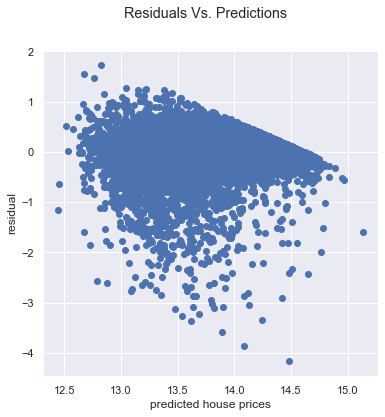

In [47]:
# plotting residuals vs predictions
model_preds = scaled_oheall_model.predict(X_cat)
resids = y2 - model_preds

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(model_preds, resids)

ax.set_xlabel('predicted house prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');
